In [34]:
import os
import sys
import yaml
from typing import List, Dict, Tuple

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import infovar

sys.path.insert(0, os.path.join("..", "..", ".."))
from infobs.plots import Plotter

sys.path.insert(1, os.path.join("..", ".."))
from orion_util import latex_line, latex_param

results_path = os.path.join("results")
figures_path = os.path.join("map_figures")

plt.rc("text", usetex=True)

In [35]:
handler = infovar.ContinuousHandler()

handler.set_paths(
    save_path=results_path,
)

In [36]:
plotter = Plotter(
    line_formatter=latex_line,
    param_formatter=latex_param
)

latex_comb_lines = lambda ls: plotter.lines_comb_formatter(ls, short=True)
latex_comb_params = lambda ps: plotter.params_comb_formatter(ps)

In [37]:
lines_list = [
    # AV
    ["12co10"],
    ["13co10"],
    ["c18o10"],
    ["hcop10"],
    ["n2hp10"],
    ["12co10", "13co10", "c18o10", "hcop10", "n2hp10"],
    # G0
    # ["12co10"],
    # ["13co10"],
    # ["cch10"],
    # ["hcop10"],
    # ["hcn10"],
    # ["12co10", "13co10", "cch10", "hcop10", "hcn10"]
]
params = ["g0"]
wins_features = ["av", "g0"]
stat = "mi"

In [38]:
ticksfontsize = 14
labelfontsize = 16
titlefontsize = 16

In [39]:
# Look for vmax
vmax = 0
for lines in lines_list:

    try:
        d = handler.read(
            lines, params, wins_features
        )
    except:
        continue

    data = d["stats"][stat]["data"]
    vmax = max(vmax, np.nanmax(data))

    wins_features = d["features"]

In [40]:
_path = os.path.join(figures_path, "_".join(params))
if not os.path.isdir(_path):
    os.mkdir(_path)

_path = os.path.join(figures_path, "_".join(params), "_".join(wins_features))
if not os.path.isdir(_path):
    os.mkdir(_path)

In [41]:
for lines in tqdm(lines_list):

    try:
        d = handler.read(
            lines, params, wins_features
        )
    except:
        continue

    data = d["stats"][stat]["data"].T
    samples = d["stats"][stat]["samples"]
    yticks, xticks = d["stats"][stat]["coords"]
    wins_features = d["features"]

    paramx, paramy = wins_features

    #

    fig = plt.figure(dpi=150)
    ax = plt.gca()

    X, Y = np.meshgrid(yticks, xticks)

    im = ax.pcolor(X, Y, data, cmap='jet', vmin=0, vmax=vmax)
    # ax.set_xlim(lims[params_regime[0]])
    # ax.set_ylim(lims[params_regime[1]])

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel(f"${plotter.param_formatter(paramx)}$", fontsize=labelfontsize)
    ax.set_ylabel(f"${plotter.param_formatter(paramy)}$", fontsize=labelfontsize)
    # ax.set_title(f"${plotter.lines_comb_formatter(lines)}$", fontsize=titlefontsize, pad=10)
    ax.set_title(f"Informativity on ${plotter.params_comb_formatter(params)}$", fontsize=titlefontsize, pad=10)

    cbar = fig.colorbar(im)
    cbar.set_label("Amount of information (bits)", labelpad=10)

    plt.savefig(os.path.join(figures_path, "_".join(params), "_".join(wins_features), f"{'_'.join(lines)}.png"))
    plt.close(fig)

  0%|          | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_1765189/2205230463.py:36: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(im)
100%|██████████| 6/6 [00:04<00:00,  1.49it/s]


In [42]:
# Pixel-wise maximum
indiv = np.zeros_like(data)
for lines in lines_list[:-1]:

    try:
        d = handler.read(
            lines, params, wins_features
        )
    except:
        continue

    indiv = np.maximum(indiv, d["stats"][stat]["data"].T)

try:
    d = handler.read(
        lines_list[-1], params, wins_features
    )
except:
    pass

combin = d["stats"][stat]["data"].T

wins_features = d["features"]

gain = combin - indiv
vmax = np.nanmax(combin)

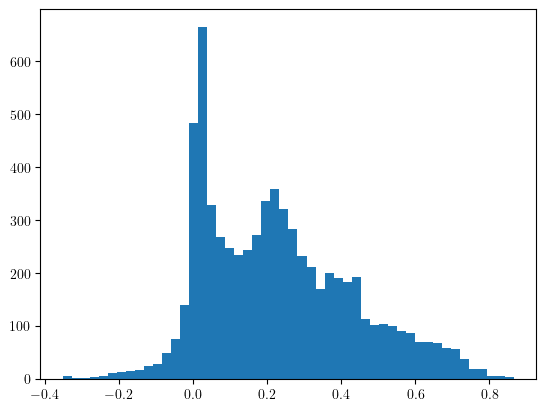

In [43]:
plt.hist(gain.flatten(), bins=50)
plt.show()

/tmp/ipykernel_1765189/97610258.py:20: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(im)
/tmp/ipykernel_1765189/97610258.py:35: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(im)
/tmp/ipykernel_1765189/97610258.py:50: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(im)


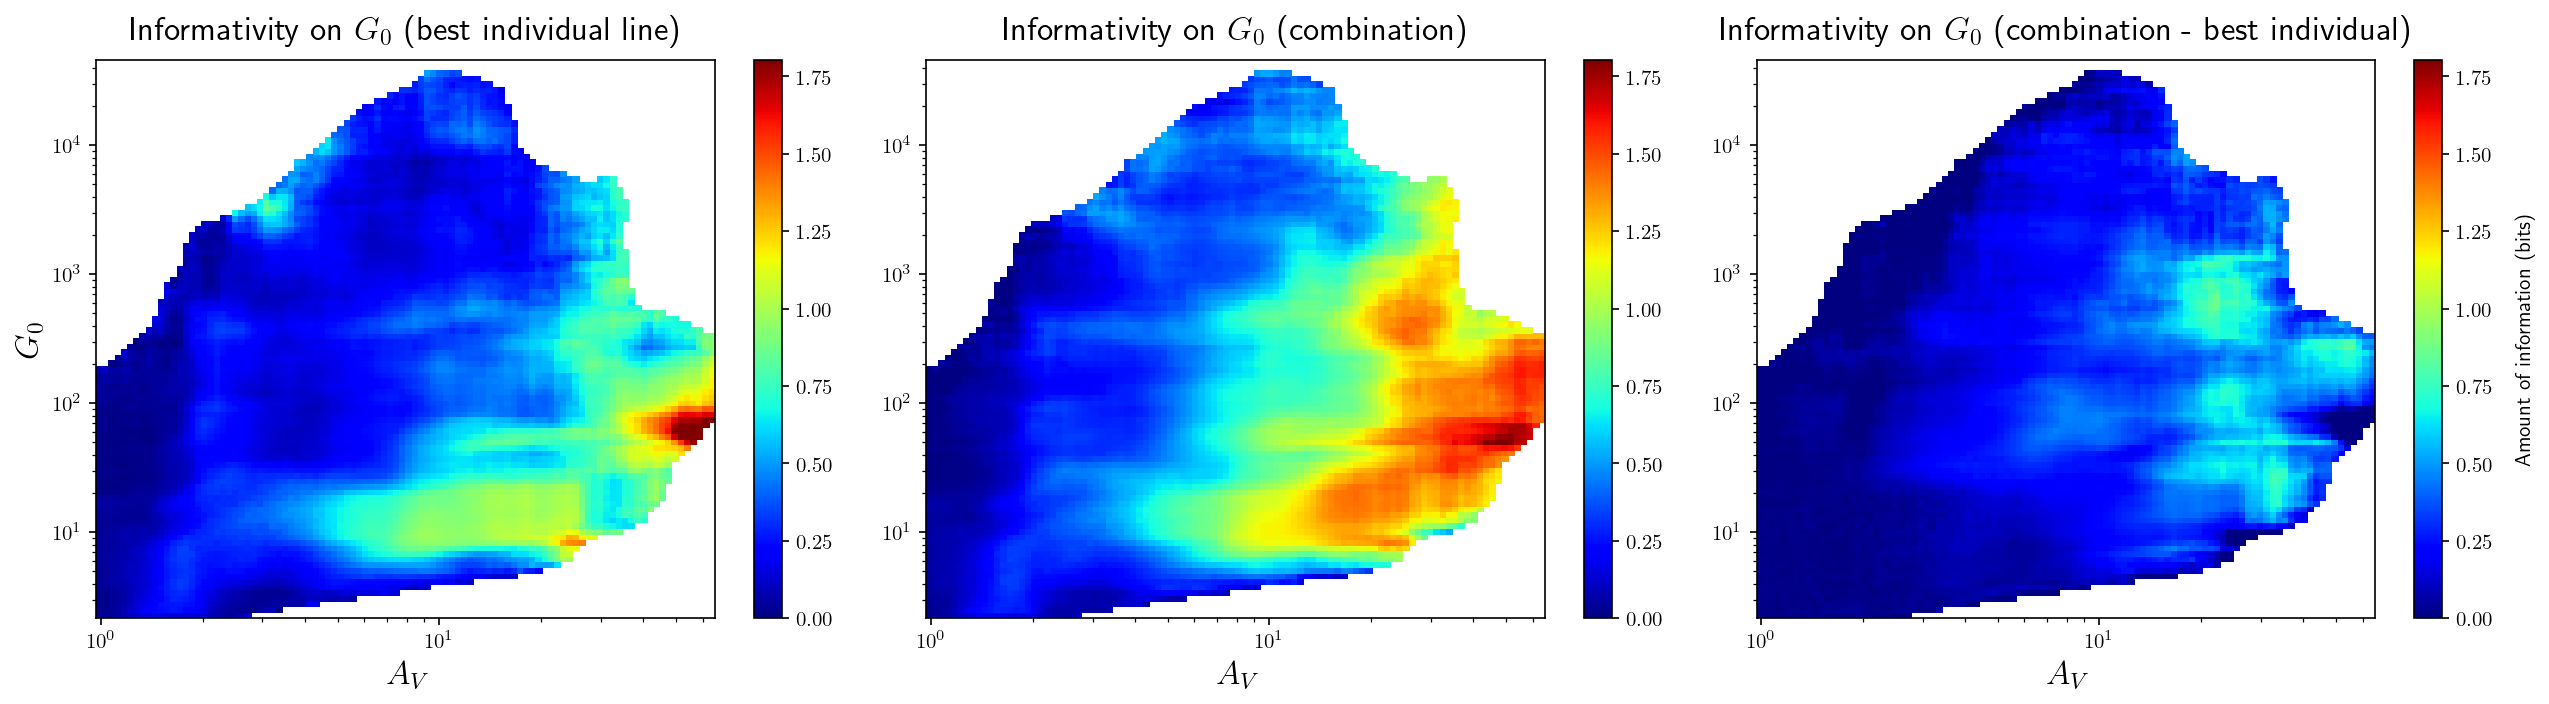

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(2.7*6.4, 4.8), dpi=150)
axs = axs.flatten()

#

X, Y = np.meshgrid(yticks, xticks)

#

ax = axs[0]
im = ax.pcolor(X, Y, indiv, cmap='jet', vmin=0, vmax=vmax)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(f"${plotter.param_formatter(paramx)}$", fontsize=labelfontsize)
ax.set_ylabel(f"${plotter.param_formatter(paramy)}$", fontsize=labelfontsize)
ax.set_title(f"Informativity on ${plotter.params_comb_formatter(params)}$ (best individual line)", fontsize=titlefontsize, pad=10)

cbar = fig.colorbar(im)
# cbar.set_label("Amount of information (bits)", labelpad=10)

#

ax = axs[1]
im = ax.pcolor(X, Y, combin, cmap='jet', vmin=0, vmax=vmax)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(f"${plotter.param_formatter(paramx)}$", fontsize=labelfontsize)
# ax.set_ylabel(f"${plotter.param_formatter(paramy)}$", fontsize=labelfontsize)
ax.set_title(f"Informativity on ${plotter.params_comb_formatter(params)}$ (combination)", fontsize=titlefontsize, pad=10)

cbar = fig.colorbar(im)
# cbar.set_label("Amount of information (bits)", labelpad=10)

#

ax = axs[2]
im = ax.pcolor(X, Y, gain, cmap='jet', vmin=0, vmax=vmax)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(f"${plotter.param_formatter(paramx)}$", fontsize=labelfontsize)
# ax.set_ylabel(f"${plotter.param_formatter(paramy)}$", fontsize=labelfontsize)
ax.set_title(f"Informativity on ${plotter.params_comb_formatter(params)}$ (combination - best individual)", fontsize=titlefontsize, pad=10)

cbar = fig.colorbar(im)
cbar.set_label("Amount of information (bits)", labelpad=10)

#

plt.tight_layout()
plt.savefig("_".join(params))